In [78]:
''' numpy - типов данных
    pandas - чтения csv 
    wave - чтение wave файла
    os - проверка существования пути файла
'''

import numpy as np
import pandas as pd
import wave
import os


# Типы данных амплитуд
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32,
}


# Открытие файла на разбор
def wave_open(filepath):
    if not os.path.exists(filepath):
        return None
    with open(filepath, 'r') as file_handler:
        wavf =  wave.open(filepath, mode='r')
        return wavf

''' Путь к файлу '''
wav = wave_open("/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/audio/Eee_test_1.wav")

# Различные вкусности из wave-файла
''' Кол-во каналов '''
def nchannals():
    nchannals_var = wav.getnchannels()
    return nchannals_var

''' Длина семпла (int8, int16, int32) '''
def sampwidth():
    sampwidth_var = wav.getsampwidth()
    return  sampwidth_var

''' Частота окон '''
def framerate():
    framerate_var = wav.getframerate()
    return framerate_var

''' Кол-во окон '''
def nframes():
    nframes_var = wav.getnframes()
    return  nframes_var

''' Тип сжатия '''
def comptype():
    comptype_var = wav.getcomptype()
    return comptype_var

''' Название сжатия '''
def compname():
    compname_var = wav.getcompname()
    return compname_var

''' Длительность записи '''
def duration():
    duration_var = nframes()/framerate()
    return duration_var

# Значения амплитуд в 10-ричной системе счисления
def channel_data():
    byte_content = wav.readframes(nframes())
    samples = np.fromstring(byte_content, dtype=types[sampwidth()])
    #for n in range(nchannals()):
    channel = samples
    return channel

''' Битовые данные'''
byte_content = wav.readframes(nframes())

''' Представление битов в int8(16,32) '''
samples = np.fromstring(byte_content, dtype=types[sampwidth()])

''' Образка первых 1000 семплов, т.к. там ненужный шум, позже можно будет убрать '''
samples = samples[1000:]
#samples = samples[131000:132000]

''' Логарифмирование семплов + минимальное значение int16 (т.к. запись была в int16), ибо логарифм не может иметь отрицательный аргумент '''
samples_log = np.log(samples+32768)
len(samples)

263192

In [79]:
import matplotlib.pyplot as plt

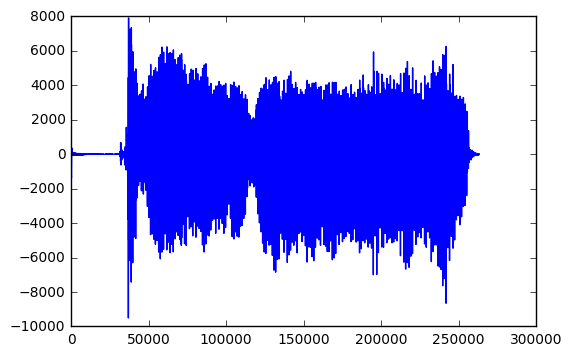

In [80]:
''' График оригинальных семплов '''
plt.plot(range(len(samples)),samples)
plt.show()

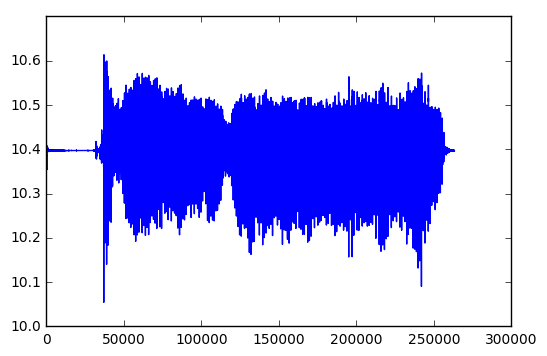

In [81]:
''' График прологарифмированных семплов (делее, лог-семплы) '''
plt.plot(range(len(samples_log)),samples_log)
plt.show()

In [82]:
#''' Преобразование Фурье из прологарифмированных семплов '''
#samples_fourier = np.fft.fft(samples_log)

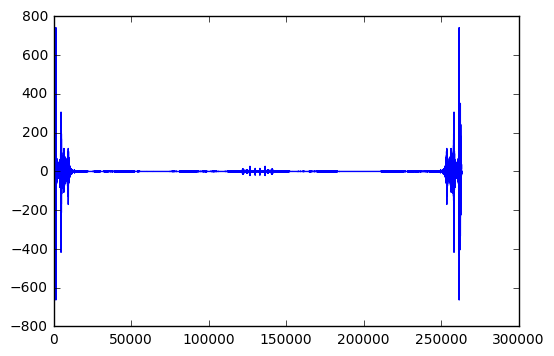

In [83]:
#''' Действительная часть пребразования фурье '''
#plt.plot(range(len(samples_fourier[1:])),samples_fourier.real[1:],)#'ro')
#plt.show()

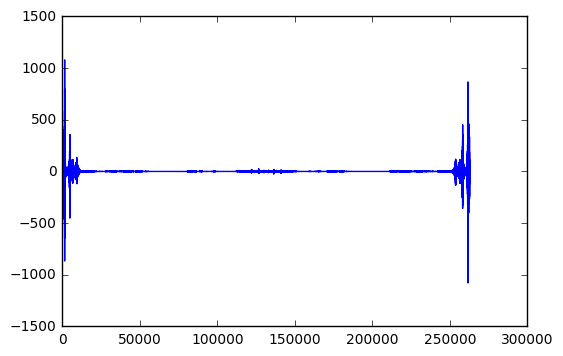

In [84]:
#''' Комплексная часть пребразования фурье (подозрительно похоже чет))0)0))'''
#plt.plot(range(len(samples_fourier[1:])),samples_fourier.imag[1:],)#'ro')
#plt.show()

In [85]:
#len(np.imag(samples_fourier))

263192

In [86]:
''' Массив из Фурье-преобразований семплов(далее, фурье-семпл), один семпл - по 1000 бит значений '''
fourier_samples = []
begin = 0
step = 1000
end = step

''' Значение для хранения временного семпла '''
tmp_sample = samples[begin:end] 

''' Добавление первого фурье-семпла  '''
fourier_samples.append(np.fft.fft(np.log(tmp_sample+32768)).real) 

''' Проход по массиву семплов и получение фурье-семплов '''
while end < len(samples):
    abs_sample = [abs(i) for i in tmp_sample]
    ''' Проверка на тишину (будем считать тишиной абсолютную сумму семпла меньшую 50000) '''
    if sum(abs_sample) > 50000: 
        tmp_sample = np.log(tmp_sample+32768) # ''' Временный лог-семпл '''
        tmp_fourier = np.fft.fft(tmp_sample).real # ''' Временный фурье-семпл '''
        fourier_samples.append(tmp_fourier)
        begin += step
        end += step
        tmp_sample = samples[begin:end] 
        print(end,sum(tmp_sample),sum(abs_sample))
    else:
        print(end,sum(abs_sample),'-')
        begin += step
        end += step
        tmp_sample = samples[begin:end]


        

2000 -3685 354663
2000 23809 -
3000 17958 -
4000 14299 -
5000 13296 -
6000 16071 -
7000 11561 -
8000 12194 -
9000 6665 -
10000 5477 -
11000 3432 -
12000 2253 -
13000 2176 -
14000 1863 -
15000 2104 -
16000 1490 -
17000 1805 -
18000 1480 -
19000 1640 -
20000 1946 -
21000 1328 -
22000 1472 -
23000 1677 -
24000 1641 -
25000 1502 -
26000 1707 -
27000 1626 -
28000 1453 -
29000 1733 -
30000 1527 -
31000 1997 -
32000 32369 -
34000 -488 147676
34000 42236 -
36000 3707 90332
37000 -188847 331055
38000 189984 544081
39000 67671 2257266
40000 -30317 1515263
41000 31204 1516487
42000 -25264 1287402
43000 -56687 1132498
44000 13689 912801
45000 -10480 721029
46000 13272 594296
47000 -3151 645242
48000 -10504 743893
49000 -12061 655516
50000 -16705 781427
51000 -10958 978461
52000 7072 1113972
53000 33728 1316730
54000 3165 1201274
55000 -19508 1187619
56000 17866 1201896
57000 58140 1091972
58000 -36039 1147766
59000 -68416 1250139
60000 76002 1411870
61000 46700 1399440
62000 -106796 1391160
63000 

In [87]:
len(fourier_samples)

229

In [88]:
''' Формирование датасета '''
answer = pd.DataFrame(fourier_samples)

In [89]:
''' Запись датасета в csv файл '''
answer.to_csv('/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/data/Eee_test_1.csv', index=False)

In [45]:
''' Дальше ничего полезного, но тут можно повозиться и понять как работает фурье '''

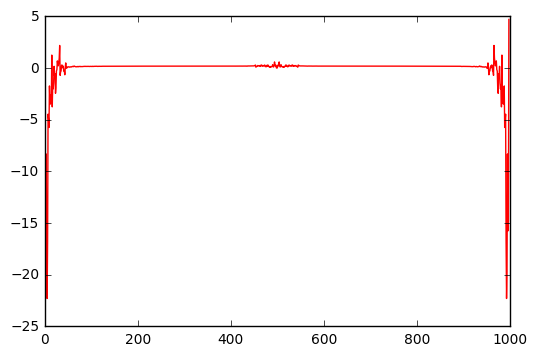

10416.5185621


In [54]:
#fourier_samples[0]
which =5

ys = fourier_samples[which][1:]
t = np.arange(len(ys))
freq = np.fft.fftfreq(t.shape[-1])


plt.plot(t,ys,'r')
plt.show()

print(max(fourier_samples[which]))


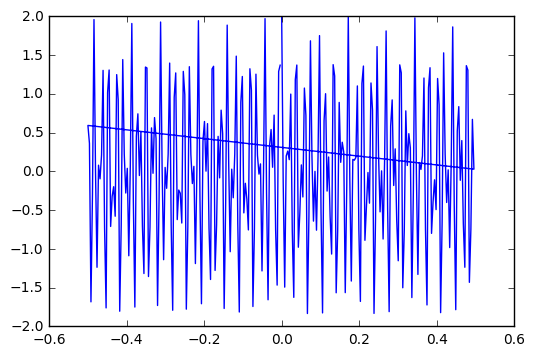

In [769]:
t = np.arange(256)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,np.cos(5*t)+np.cos(2*t))
plt.show()

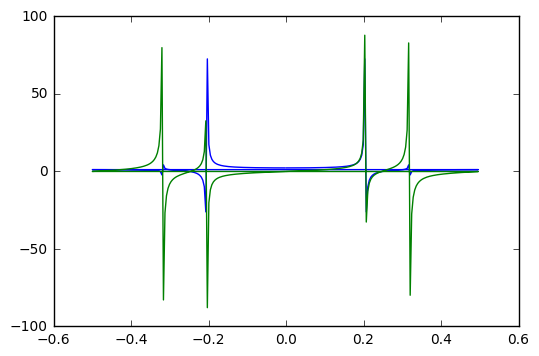

In [717]:
import matplotlib.pyplot as plt
#t = np.arange(256)
sp = np.fft.fft(np.cos(5*t)+np.cos(2*t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
#plt.plot(t,np.cos(t))
plt.show()

In [55]:
import keyboard

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keyboard/__init__.py", line 114, in listen
    _os_keyboard.listen(self.queue)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keyboard/_nixkeyboard.py", line 111, in listen
    build_device()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keyboard/_nixkeyboard.py", line 105, in build_device
    ensure_root()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keyboard/_nixcommon.py", line 163, in ensure_root
    raise ImportError('You must be root to 

KeyboardInterrupt: 